In [2]:
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

from mlxtend.preprocessing import TransactionEncoder

In [3]:
movies = pd.read_csv('D:\\EXCEL R\\ASSIGNMENTS\\association rules\\my_movies.csv')
movies

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [4]:
movies.shape

(10, 15)

In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [6]:
movies.drop(columns =['V1','V2','V3','V4','V5']) 
df = pd.get_dummies(movies)
df.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,...,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,1
1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [7]:
apriori(df, min_support=0.002,use_colnames=True,max_len=3)

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
337,0.1,"(V4_Green Mile, V2_LOTR, V3_Gladiator)"
338,0.1,"(V2_LOTR1, V3_Harry Potter1, V4_Green Mile)"
339,0.1,"(V2_LOTR1, V5_LOTR2, V3_Harry Potter1)"
340,0.1,"(V2_LOTR1, V5_LOTR2, V4_Green Mile)"


In [8]:
apriori(df, min_support=0.25,use_colnames=True)

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.6,(V1_Gladiator)
4,0.6,(V2_Patriot)
...,...,...
58,0.4,"(Sixth Sense, V2_Patriot, Patriot, V3_Sixth Se..."
59,0.4,"(Sixth Sense, V2_Patriot, V1_Gladiator, V3_Six..."
60,0.4,"(Sixth Sense, V2_Patriot, Patriot, V1_Gladiato..."
61,0.4,"(V2_Patriot, Patriot, V1_Gladiator, V3_Sixth S..."


In [9]:
frequent_itemsets = apriori(df, min_support=0.002,use_colnames=True,max_len=3)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets
frequent_itemsets.head()


,support,itemsets,length
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.2,(LOTR1),1
3,0.2,(Harry Potter1),1
4,0.6,(Patriot),1


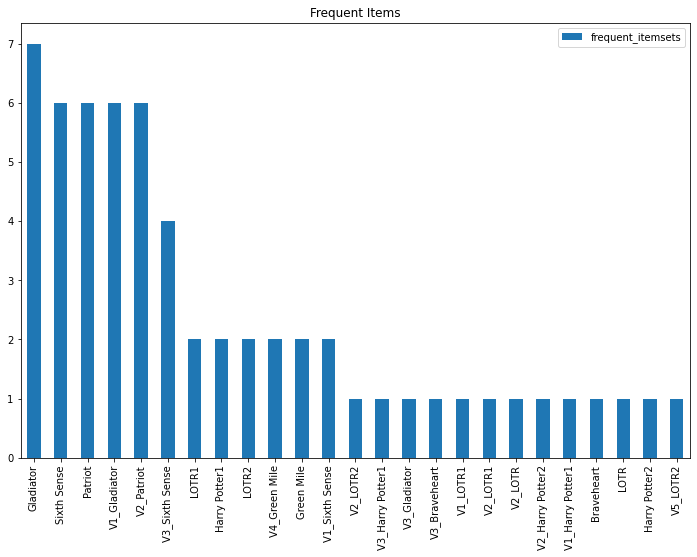

In [10]:
import matplotlib.pyplot as plt
df.sum().to_frame('frequent_itemsets').sort_values('frequent_itemsets',ascending=False)[:25].plot(kind='bar', figsize=(12,8),
                                                                                  title="Frequent Items")
plt.show()

In [11]:

a=frequent_itemsets[ (frequent_itemsets['length'] == 1) &
                   (frequent_itemsets['support'] >= 0.05) ]
a

,support,itemsets,length
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.2,(LOTR1),1
3,0.2,(Harry Potter1),1
4,0.6,(Patriot),1
5,0.2,(LOTR2),1
6,0.1,(Harry Potter2),1
7,0.1,(LOTR),1
8,0.1,(Braveheart),1
9,0.2,(Green Mile),1


In [12]:
b=frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.05) ]
b

,support,itemsets,length
25,0.5,"(Sixth Sense, Gladiator)",2
26,0.1,"(Sixth Sense, LOTR1)",2
27,0.1,"(Sixth Sense, Harry Potter1)",2
28,0.4,"(Sixth Sense, Patriot)",2
29,0.1,"(Sixth Sense, LOTR2)",2
...,...,...,...
121,0.4,"(V2_Patriot, V3_Sixth Sense)",2
122,0.1,"(V4_Green Mile, V3_Gladiator)",2
123,0.1,"(V3_Harry Potter1, V4_Green Mile)",2
124,0.1,"(V3_Harry Potter1, V5_LOTR2)",2


In [13]:
c=frequent_itemsets[ (frequent_itemsets['length'] == 3) &
                   (frequent_itemsets['support'] >= 0.05) ]
c

,support,itemsets,length
126,0.4,"(Sixth Sense, Patriot, Gladiator)",3
127,0.1,"(Sixth Sense, LOTR, Gladiator)",3
128,0.1,"(Sixth Sense, Green Mile, Gladiator)",3
129,0.4,"(Sixth Sense, V1_Gladiator, Gladiator)",3
130,0.1,"(Sixth Sense, V1_Sixth Sense, Gladiator)",3
...,...,...,...
337,0.1,"(V4_Green Mile, V2_LOTR, V3_Gladiator)",3
338,0.1,"(V2_LOTR1, V3_Harry Potter1, V4_Green Mile)",3
339,0.1,"(V2_LOTR1, V5_LOTR2, V3_Harry Potter1)",3
340,0.1,"(V2_LOTR1, V5_LOTR2, V4_Green Mile)",3


In [14]:
print(frequent_itemsets.shape)

(342, 3)


In [21]:
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
2,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
3,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
4,(Sixth Sense),(Harry Potter1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
...,...,...,...,...,...,...,...,...,...
1493,"(V3_Harry Potter1, V4_Green Mile)",(V5_LOTR2),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
1494,"(V4_Green Mile, V5_LOTR2)",(V3_Harry Potter1),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
1495,(V3_Harry Potter1),"(V4_Green Mile, V5_LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
1496,(V5_LOTR2),"(V3_Harry Potter1, V4_Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf


In [16]:
rules [ (rules['lift'] >1.1)  & (rules['confidence']> 0.8)  ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
11,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
13,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
17,(V1_Sixth Sense),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
19,(V2_LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
1492,"(V3_Harry Potter1, V5_LOTR2)",(V4_Green Mile),0.1,0.2,0.1,1.000000,5.000000,0.08,inf
1493,"(V3_Harry Potter1, V4_Green Mile)",(V5_LOTR2),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
1494,"(V4_Green Mile, V5_LOTR2)",(V3_Harry Potter1),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
1495,(V3_Harry Potter1),"(V4_Green Mile, V5_LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf


In [17]:
rules.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
749,"(V4_Green Mile, Gladiator)",(V3_Gladiator),0.1,0.1,0.1,1.0,10.0,0.09,inf
1096,"(Braveheart, Patriot)",(V3_Braveheart),0.1,0.1,0.1,1.0,10.0,0.09,inf
1069,(V3_Harry Potter1),"(V4_Green Mile, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
391,(V3_Harry Potter1),"(Sixth Sense, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
390,"(Sixth Sense, LOTR2)",(V3_Harry Potter1),0.1,0.1,0.1,1.0,10.0,0.09,inf
1073,"(V3_Harry Potter1, Harry Potter1)",(V5_LOTR2),0.1,0.1,0.1,1.0,10.0,0.09,inf
1074,"(V5_LOTR2, Harry Potter1)",(V3_Harry Potter1),0.1,0.1,0.1,1.0,10.0,0.09,inf
1075,(V3_Harry Potter1),"(V5_LOTR2, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
1076,(V5_LOTR2),"(V3_Harry Potter1, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
385,(V2_LOTR1),"(Sixth Sense, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf


In [18]:
a=rules[ (rules['lift'] >= 10) &
                   (rules['support'] >= 0.05) ]
a

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
124,(V1_Harry Potter1),(Harry Potter2),0.1,0.1,0.1,1.0,10.0,0.09,inf
125,(Harry Potter2),(V1_Harry Potter1),0.1,0.1,0.1,1.0,10.0,0.09,inf
126,(Harry Potter2),(V2_Harry Potter2),0.1,0.1,0.1,1.0,10.0,0.09,inf
127,(V2_Harry Potter2),(Harry Potter2),0.1,0.1,0.1,1.0,10.0,0.09,inf
132,(V2_LOTR),(LOTR),0.1,0.1,0.1,1.0,10.0,0.09,inf
...,...,...,...,...,...,...,...,...,...
1490,(V5_LOTR2),"(V2_LOTR1, V4_Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
1493,"(V3_Harry Potter1, V4_Green Mile)",(V5_LOTR2),0.1,0.1,0.1,1.0,10.0,0.09,inf
1494,"(V4_Green Mile, V5_LOTR2)",(V3_Harry Potter1),0.1,0.1,0.1,1.0,10.0,0.09,inf
1495,(V3_Harry Potter1),"(V4_Green Mile, V5_LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf


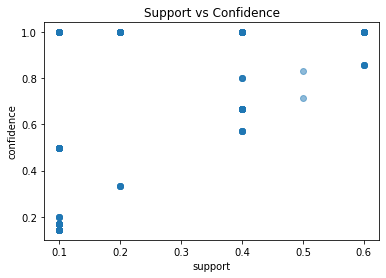

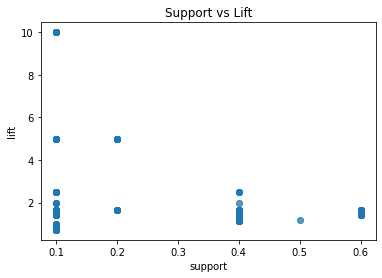

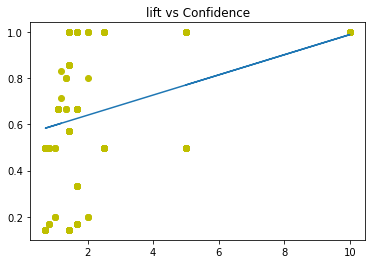

In [19]:
import matplotlib.pyplot as plt
plt.scatter(rules['support'],rules['confidence'],alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()
plt.scatter(rules['support'],rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.title('lift vs Confidence')
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
 fit_fn(rules['lift']))